In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# To read data to python

In [2]:
data=pd.read_csv('Downloads/Data science/Add_sales_data_2018.csv')
data.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [3]:
data.isna().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

In [4]:
data.columns

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)'],
      dtype='object')

# 1.Relationship between the amount spent by 5 companies and profit generated

In [6]:
data.corr()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
Add1(in Thousands),1.000000,0.990976,0.986274,0.976365,0.976716,0.991975
Add2(in Thousands),0.990976,1.000000,0.987990,0.989921,0.990285,0.999145
Add3(in Thousands),0.986274,0.987990,1.000000,0.991343,0.991908,0.993389
Add4(in Thousands),0.976365,0.989921,0.991343,1.000000,0.999699,0.993346
Add5(in Thousands),0.976716,0.990285,0.991908,0.999699,1.000000,0.993710
Profit(in Thousands),0.991975,0.999145,0.993389,0.993346,0.993710,1.000000


<AxesSubplot:>

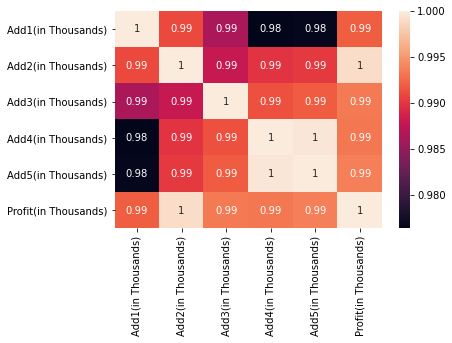

In [7]:
sns.heatmap(data.corr(),annot=True)

From the coefficient of correlation we can find the relationship between the amount spent by 5 different companies on advertisment and there profit. See the first five rows of last column. The coeffecient of correlation of all add's are almost nearer to 1. But for Add 2 it is 1 which show that there is high positive relation between amount spend on the company that produced Add 2 and the total profit. The Advertising company that made Add 2 have a big role in making profit for the textile company. Other advertising companies will also play a role in making profit because they also show a high positive relationship with profit since there correlation cofficient is 0.99. 

# 2. A regression model to predict the profit

In [11]:
#To generate a regression model
data1=data.drop(['Date'],axis=1)
x=data1.drop(['Profit(in Thousands)'],axis=1)
y=data1['Profit(in Thousands)']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)

# To predict the values
prediction=model.predict(x_test)

#To make it as a table
evaluate = pd.DataFrame({'Actual': y_test, 'Predicted': prediction})
evaluate

,Actual,Predicted
15,4152.066,4152.066
9,4446.441,4446.441
100,5131.898,5131.898
132,4907.560,4907.560
68,5004.282,5004.282
95,4623.793,4623.793
159,5384.175,5384.175
162,5328.025,5328.025
147,5175.051,5175.051
182,5956.323,5956.323


In [13]:
#To compare the values and find error
from sklearn.metrics import mean_squared_error
print("Mean squared error is:",mean_squared_error(y_test,prediction))

Mean squared error is: 9.067172099138958e-25


From the table it is clear that the predicted values and the actual values are the same. And the error  is very small number near to 0. So our line is a best fit line. We can use this line to predict the profit. 

# 3.Predict the profit generated by the company

In [14]:
#To predict the value
p={'Add1':[290],'Add2':[312],'Add3':[309],'Add4':[298],'Add5':[320]}
k=pd.DataFrame(p)
prediction=model.predict(k)
print("The predicted value is",prediction)


The predicted value is [5820.06]
